 ## CNN Tutorial - Image Classification

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

### Import Dataset from Tensorflow library 
We will load CIFAR-10 dataset from Tesorflow libarary. It contains 6000 images.
The output of load_data() is two tuples as follows.

In [4]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 77s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

We see that the shape of X_train is 5000 images, each image with size of 32 X 32 and each has 3 RGB channels.

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

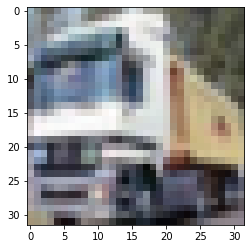

In [12]:
plt.imshow(X_train[1])

We see that each element in X_train is represented in 28 X 28 X 3 matrix.

To show the image of any of images in X_train, we can use plt.imshow(X_train[i]) command. 

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

We see that y_train is two dimensional array which is not necesarry as we need only the labels of the images as one-dimentional array.

In [20]:
y_train = y_train.reshape(-1,)

In [21]:
y_train[0:4]

array([6, 9, 9, 4], dtype=uint8)

In reshape function we use -1 to keep the dimension as it is. In our case we need to keep 5000 so we used -1.

In [22]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Now, we will normalize our images. Each pixel is represented by a value of 255. We will devide the array by 255 to get the normalized data.

In [23]:
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Classification using ANN
we will create an artificial neural network to train our dataset and see the performance then we will apply CNN.

The input layer will be with shape 32 X 32 X 3 as the size of each image. The hidden layers are Dense with 3000 and 1000.
The output layer is 10 neurons as we have ten categories in our dataset.
'sparse_categorial_crossentropy' is the same as 'categorial crossentropy' but in sparse it will return a number of the predicted category but in 'categorical_crossentropy' the return value is an array with one hot encoded value of the the expected category.

In [24]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 211s 135ms/step - loss: 1.9318 - accuracy: 0.3077
Epoch 2/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.6391 - accuracy: 0.4214
Epoch 3/5
1563/1563 [==============================] - 152s 98ms/step - loss: 1.5491 - accuracy: 0.4538
Epoch 4/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4914 - accuracy: 0.4752
Epoch 5/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.4360 - accuracy: 0.4957


In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.65      0.52      1000
           1       0.58      0.65      0.61      1000
           2       0.38      0.39      0.38      1000
           3       0.42      0.21      0.28      1000
           4       0.41      0.39      0.40      1000
           5       0.41      0.40      0.40      1000
           6       0.48      0.64      0.55      1000
           7       0.54      0.56      0.55      1000
           8       0.57      0.64      0.61      1000
           9       0.73      0.32      0.45      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [26]:
y_pred

array([[0.36304593, 0.55021775, 0.6669009 , ..., 0.07770044, 0.5879505 ,
        0.06647384],
       [0.90181017, 0.9136081 , 0.37074462, ..., 0.16048762, 0.9687742 ,
        0.95868355],
       [0.9732089 , 0.8454951 , 0.3515144 , ..., 0.17550904, 0.97814786,
        0.8457615 ],
       ...,
       [0.10504457, 0.07336757, 0.85321575, ..., 0.58688664, 0.29449642,
        0.10987514],
       [0.5321035 , 0.28651094, 0.7933527 , ..., 0.41931063, 0.12743813,
        0.11354554],
       [0.6280799 , 0.12365746, 0.6966927 , ..., 0.88282704, 0.14044207,
        0.16217479]], dtype=float32)

As we can see the performance of ANN network is low (49%) as the ANN is not a good option of image classification. The CCN is better in image classification as we add layers of convolution + Activation functions and pooling layers. The reset of classification part is dense ANN to provide the output of classification.

### Image Classification using Convolutional Neural Network (CNN) 

In [27]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
    
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

We kept the dense network but it will be after the convolutional and pooling layers. First we will reduce the hidden layers and the number of the neurons because the convolution layers will do most of the work.
We didn't specify input for the flattern layer as the network will figure it by its own.

Softmax activation function is used to normalize the probability of the predicted class.  In softmax, the sum of all categories is 1, but in sigmoid it's  not necesarry to be 1 all the time.

In convolutional layers you need only to provide the filters sizes, number of filters, and the activation functions and CNN will train the filters to get the values with lowest loss.

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 124s 79ms/step - loss: 1.6983 - accuracy: 0.3821
Epoch 2/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.1697 - accuracy: 0.5869
Epoch 3/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.0113 - accuracy: 0.6478
Epoch 4/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9212 - accuracy: 0.6814
Epoch 5/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.8603 - accuracy: 0.7030
Epoch 6/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.8090 - accuracy: 0.7180
Epoch 7/10
1563/1563 [==============================] - 132s 84ms/step - loss: 0.7515 - accuracy: 0.7378
Epoch 8/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.7171 - accuracy: 0.7510
Epoch 9/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.6686 - accuracy: 0.7678
Epoch 10/10
1563/1563 [==============================] 

In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 19ms/step - loss: 0.9532 - accuracy: 0.6896


[0.9532181620597839, 0.6895999908447266]

In [31]:
y_pred = cnn.predict(X_test)

In [34]:
y_pred_classes = [np.argmax(i) for i in y_pred]

In [44]:
y_pred_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 6, 5, 7, 8, 6]

In [38]:
y_test = y_test.reshape(-1,)

In [45]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

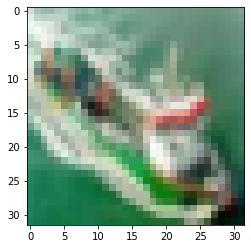

In [47]:
plt.imshow(X_test[15])

In [49]:
classes[y_pred_classes[15]]

'frog'